In [1]:
import numpy as np
import sys
import os
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker

In [2]:
from util_functions import  cutoffPercentile, wireIntegrate, toGreyScale, createXYZGrid

<div>
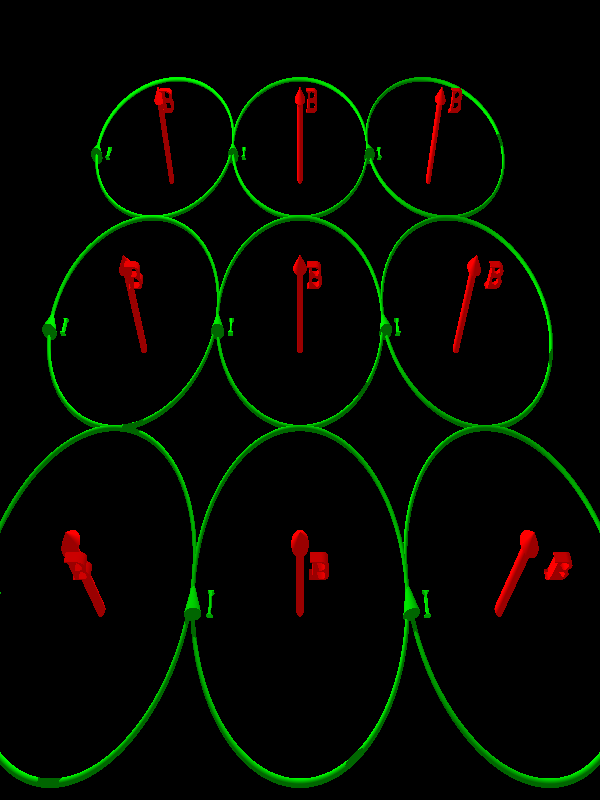
</div>

In [3]:
meshsize = 100  # The size of the mesh grid
I = 1 # 1 amp of current flowing through coil
mu0 = 4 *np.pi*10**(-7)  # magnetic permeability constant
radius = .01  # radius of coil in meters
bbox = (-.05,-.05, -.05, .05, .05, .05)  # bounding box of visual area in meters
#bbox = (-.05,-.05, .05, .05)  # bounding box of visual area in meters
with open("bField-coil-3d.npz","rb") as f:
    data = np.load(f)
    xgrid = data['xgrid']
    ygrid = data['ygrid']
    zgrid = data['zgrid']
    bField = data['bField']
    
print(bField.shape)

(200, 200, 200, 3)


In [4]:
xmin = xgrid[0,:,0][0]
xmax = xgrid[0,:,0][-1]

ymin = ygrid[:,0,0][0]
ymax = ygrid[:,0,0][-1]

zmin = zgrid[0,0, :][0]
zmax = zgrid[0,0,:][-1]

bbox=[ xmin, ymin, zmin, xmax, ymax, zmax]
print (bbox)


[-0.05, -0.05, -0.05, 0.05, 0.05, 0.05]


In [5]:
magnitudes = np.linalg.norm(bField * mu0/(4*np.pi), axis=-1)
print (magnitudes.shape)

# Now we are only interested in the magnitude of the integral result rather
# than it's direction.
sliceZ = magnitudes.shape[2] // 2
slice = magnitudes[:,:, sliceZ]
x = xgrid[:,:, sliceZ]
y = ygrid[:, :, sliceZ]
mags2 = cutoffPercentile(slice, 99.5)
print (mags2.shape)

(200, 200, 200)
(200, 200)


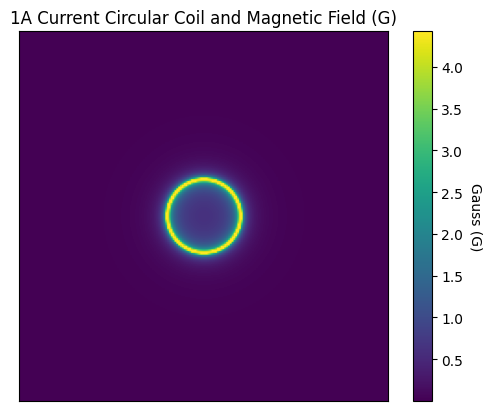

In [6]:
fig,ax = plt.subplots()
plt.title("1A Current Circular Coil and Magnetic Field (G)")

ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())

im = ax.imshow(mags2*10000)  # Convert to Gauss units
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Gauss (G)", rotation=-90, va="bottom")

plt.show()

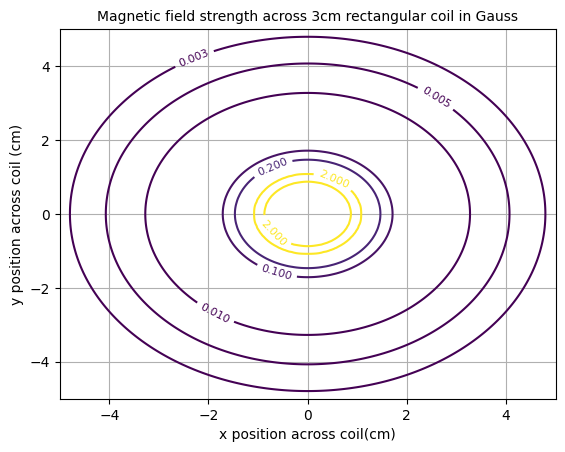

In [7]:
fig,ax = plt.subplots()
CS = ax.contour(x*100, y*100, mags2*10000, levels=(.003, .005, .01, .1, .2, 2 ))
ax.clabel(CS, inline=True, fontsize=8)
ax.grid()
ax.set_title("Magnetic field strength across 3cm rectangular coil in Gauss", fontsize=10)
ax.set(xlabel='x position across coil(cm)', ylabel='y position across coil (cm)')
plt.show()

In [8]:
# Now we are only interested in the magnitude of the integral result rather
# than it's direction.

sliceY = magnitudes.shape[1] // 2
slice = magnitudes[:, sliceY, :]

# Now we are only interested in the magnitude of the integral result rather
# than it's direction.
sliceZ = magnitudes.shape[2] // 2
slice = magnitudes[:,sliceY, :]
x = xgrid[:,:, sliceZ]
z = ygrid[:, sliceY, :]
mags2 = cutoffPercentile(slice, 99.5)
print (mags2.shape)


(200, 200)


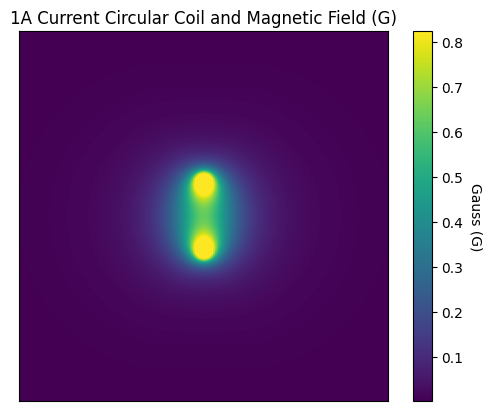

In [9]:
fig,ax = plt.subplots()
plt.title("1A Current Circular Coil and Magnetic Field (G)")

ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())

im = ax.imshow(mags2*10000)  # Convert to Gauss units
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Gauss (G)", rotation=-90, va="bottom")

plt.show()

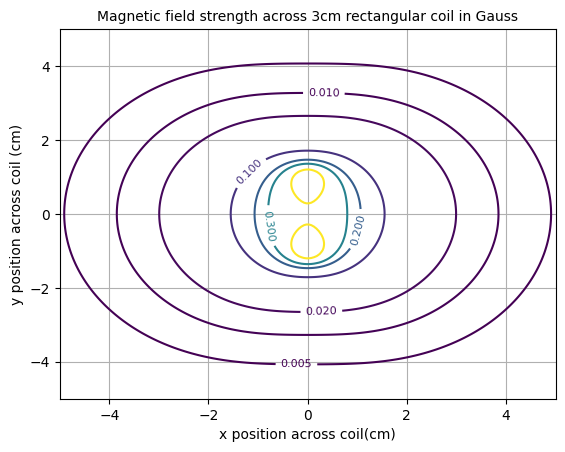

In [10]:
fig,ax = plt.subplots()
CS = ax.contour(x*100, z*100, mags2*10000, levels=(.005, .01,.02, .1, .2, .3,  .67 ))
ax.clabel(CS, inline=True, fontsize=8)
ax.grid()
ax.set_title("Magnetic field strength across 3cm rectangular coil in Gauss", fontsize=10)
ax.set(xlabel='x position across coil(cm)', ylabel='y position across coil (cm)')
plt.show()

How to add one three dimensional array to another?

The central coil is in the middle.  The coil has a radius.  There is also a bounding box for the entire plot, not just the coil.

<pre>
ArraySize (AS)
Total object width in pixels (TOWP) = 2*radius/(xmax -xmin)
Total times fit into array (TTFIA) = int((xmax -xmin)/(2*radius))
    
Start position of object in source Array (SPOIA) = (AS - TOWP)/2
End position of object in source  Array ( EPOIA ) = (AS + TOWP)/2
    
Destination start index of object array (DSIOA) = ( 0, 1, 2,... TTFIA ) * TOWP
Source Start index of array (SSIOA) = SPOIA - DSIOA ; If > ArrayBegin then ArrayBegin
Source End indexof array (SEIOA) = TTIFA * (TOWP + 1) - DSIOA ; if < ArrayEnd then ArrayEnd
Source Segment Size (SSS) = SEIOA - SSIOA

Dest[TOWP*index] += Source[SSIOA:SEIOA]
                                                                       
 </pre>

In [11]:
bField2 =  np.zeros_like(bField)
for ii in range(0,4):
    for jj in range(0,4):
        bField2[ii*50:(ii+1)*50, jj*50:(jj+1)*50] += bField[75:125, 75:125]

print(bField2.shape)

(200, 200, 200, 3)


In [12]:
magnitudes = np.linalg.norm(bField2 * mu0/(4*np.pi), axis=-1)
print (magnitudes.shape)

# Now we are only interested in the magnitude of the integral result rather
# than it's direction.
sliceZ = magnitudes.shape[2] // 2
slice = magnitudes[:,:, sliceZ]
x = xgrid[:,:, sliceZ]
y = ygrid[:, :, sliceZ]
mags2 = cutoffPercentile(slice, 99.5)
print (mags2.shape)

(200, 200, 200)
(200, 200)


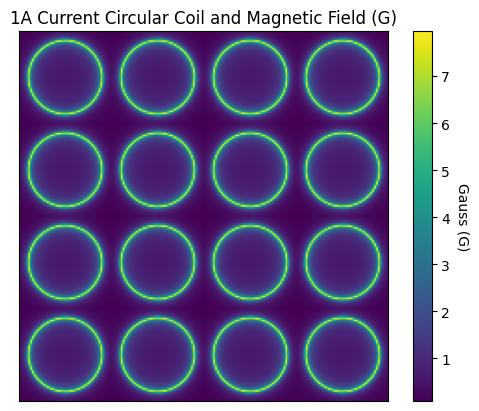

In [13]:
fig,ax = plt.subplots()
plt.title("1A Current Circular Coil and Magnetic Field (G)")

ax.xaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_major_locator(ticker.NullLocator())

im = ax.imshow(mags2*10000)  # Convert to Gauss units
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Gauss (G)", rotation=-90, va="bottom")

plt.show()